In [51]:
%pylab inline
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [50]:
df = spark.read.format('com.databricks.spark.avro').load('hdfs://cloudera:8020/user/cloudera/*/*/*/*/*/*.avro')

demos = pd.DataFrame([r.asDict() for r in df.head(10000)])
demos.shape

(10000, 15)

In [64]:
df.where('admit_type = "Emergency"').count()

5971

In [65]:
df.where('admit_type = "Not_A_Thing"').count()

0

In [53]:
demos.head()

,admit_source,admit_type,dob,first_name,gender,height,hospital,last_name,marital_status,provider_name,provider_phone,race,service,visit_number,weight
0,TRANSFER,Pregnancy,1985-02-22T00:00:00,Heidi,Female,1.405,HUP,Mcguire,Married,"Cisneros, Nathan",2152258352,White,OBSTETRICS,8.227628e+11,72.962
1,EMERGENCY,Emergency,1963-04-26T00:00:00,Lawrence,Male,1.487,HUP,Walker,Married,"Willis, Haley",2679125419,White,EMERGENCY_DEPARTMENT,5.255735e+11,53.871
2,ROUTINE,Routine,1935-06-23T00:00:00,Julia,Female,1.453,PAH,Larson,Single,"Schmidt, Laura",2674619106,Black,EMERGENCY_DEPARTMENT,2.850387e+11,73.572
3,EMERGENCY,Emergency,1954-06-06T00:00:00,David,Male,1.300,HUP,Williams,Single,"Rojas, Alejandra",2152524889,Black,ORTHOPEDICS,4.875204e+11,64.756
4,TRANSFER,Emergency,1973-01-08T00:00:00,Rebecca,Female,1.627,PAH,Lowe,Single,"Alexander, Darrell",2151395896,Black,EMERGENCY_DEPARTMENT,8.631522e+11,66.939


In [54]:
sns.set_palette('colorblind')
sns.set_context("talk", font_scale=1.2)
figsize(10, 5)

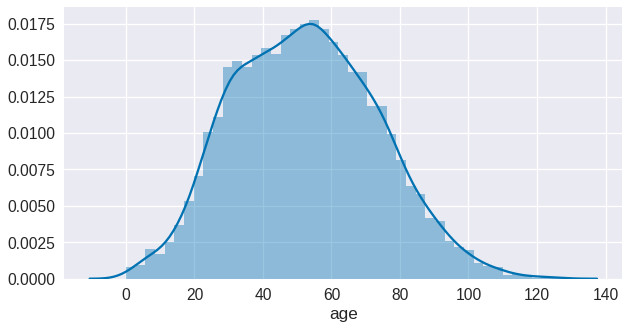

In [55]:
demos['dob'] = pd.to_datetime(demos['dob'])

demos['age'] = datetime.datetime.now() - demos['dob']
demos['age'] = demos['age'].astype(int).astype(float) / 3.1536e+16 # nanoseconds in a year
sns.distplot(demos['age'])

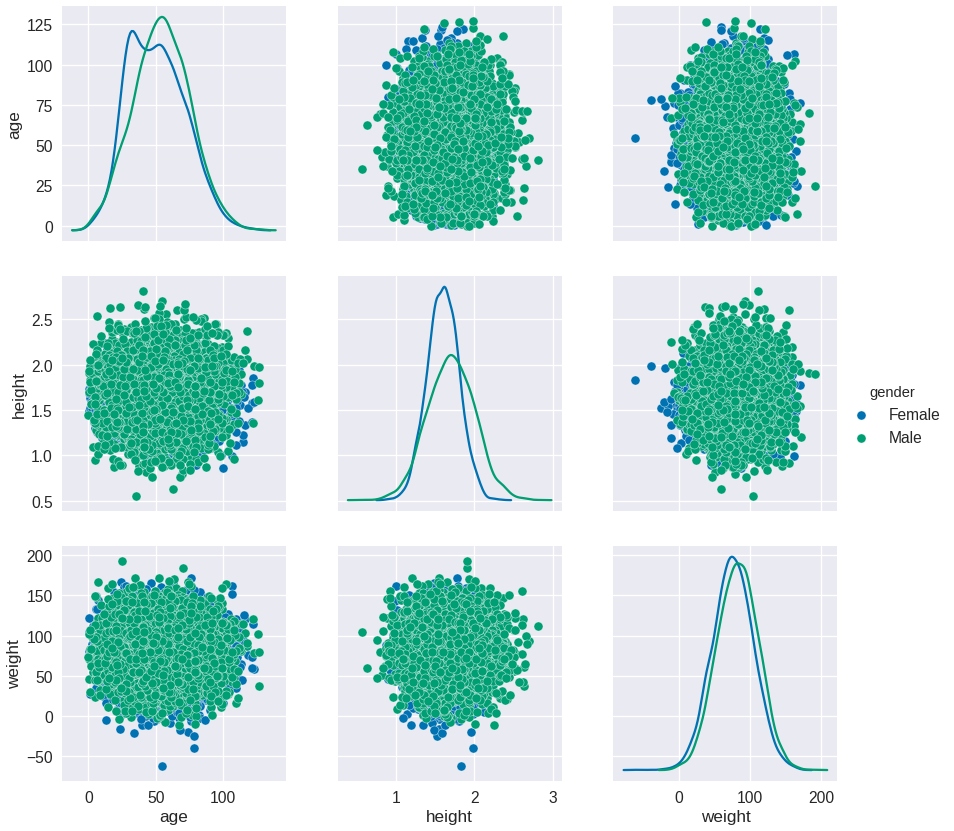

In [56]:
g = sns.pairplot(demos[['age', 'height', 'gender', 'weight']], hue="gender", diag_kind="kde", size=4)

In [57]:
columns_to_encode = ['admit_source', 'admit_type', 'hospital', 'marital_status', 'race', 'service']
columns_to_exclude = ['first_name', 'last_name', 'provider_name', 'provider_phone', 'visit_number']
demos_encoded = demos[list(set(demos.columns) - set(columns_to_encode + columns_to_exclude))]
encoder_dict = {}
for column in columns_to_encode:
    encoder_dict[column] = LabelEncoder().fit(demos[column])
    demos_encoded[column] = encoder_dict[column].transform(demos[column])
demos_encoded.head()

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,dob,age,gender,weight,height,admit_source,admit_type,hospital,marital_status,race,service
0,1985-02-22,32.357933,Female,72.962,1.405,2,1,0,1,5,6
1,1963-04-26,54.201769,Male,53.871,1.487,0,0,0,1,5,2
2,1935-06-23,82.062043,Female,73.572,1.453,1,2,1,2,1,2
3,1954-06-06,63.094919,Male,64.756,1.300,0,0,0,2,1,8
4,1973-01-08,44.489440,Female,66.939,1.627,2,0,1,2,1,2


In [59]:
demos_encoded2 = demos[list(set(demos.columns) - set(columns_to_exclude))]

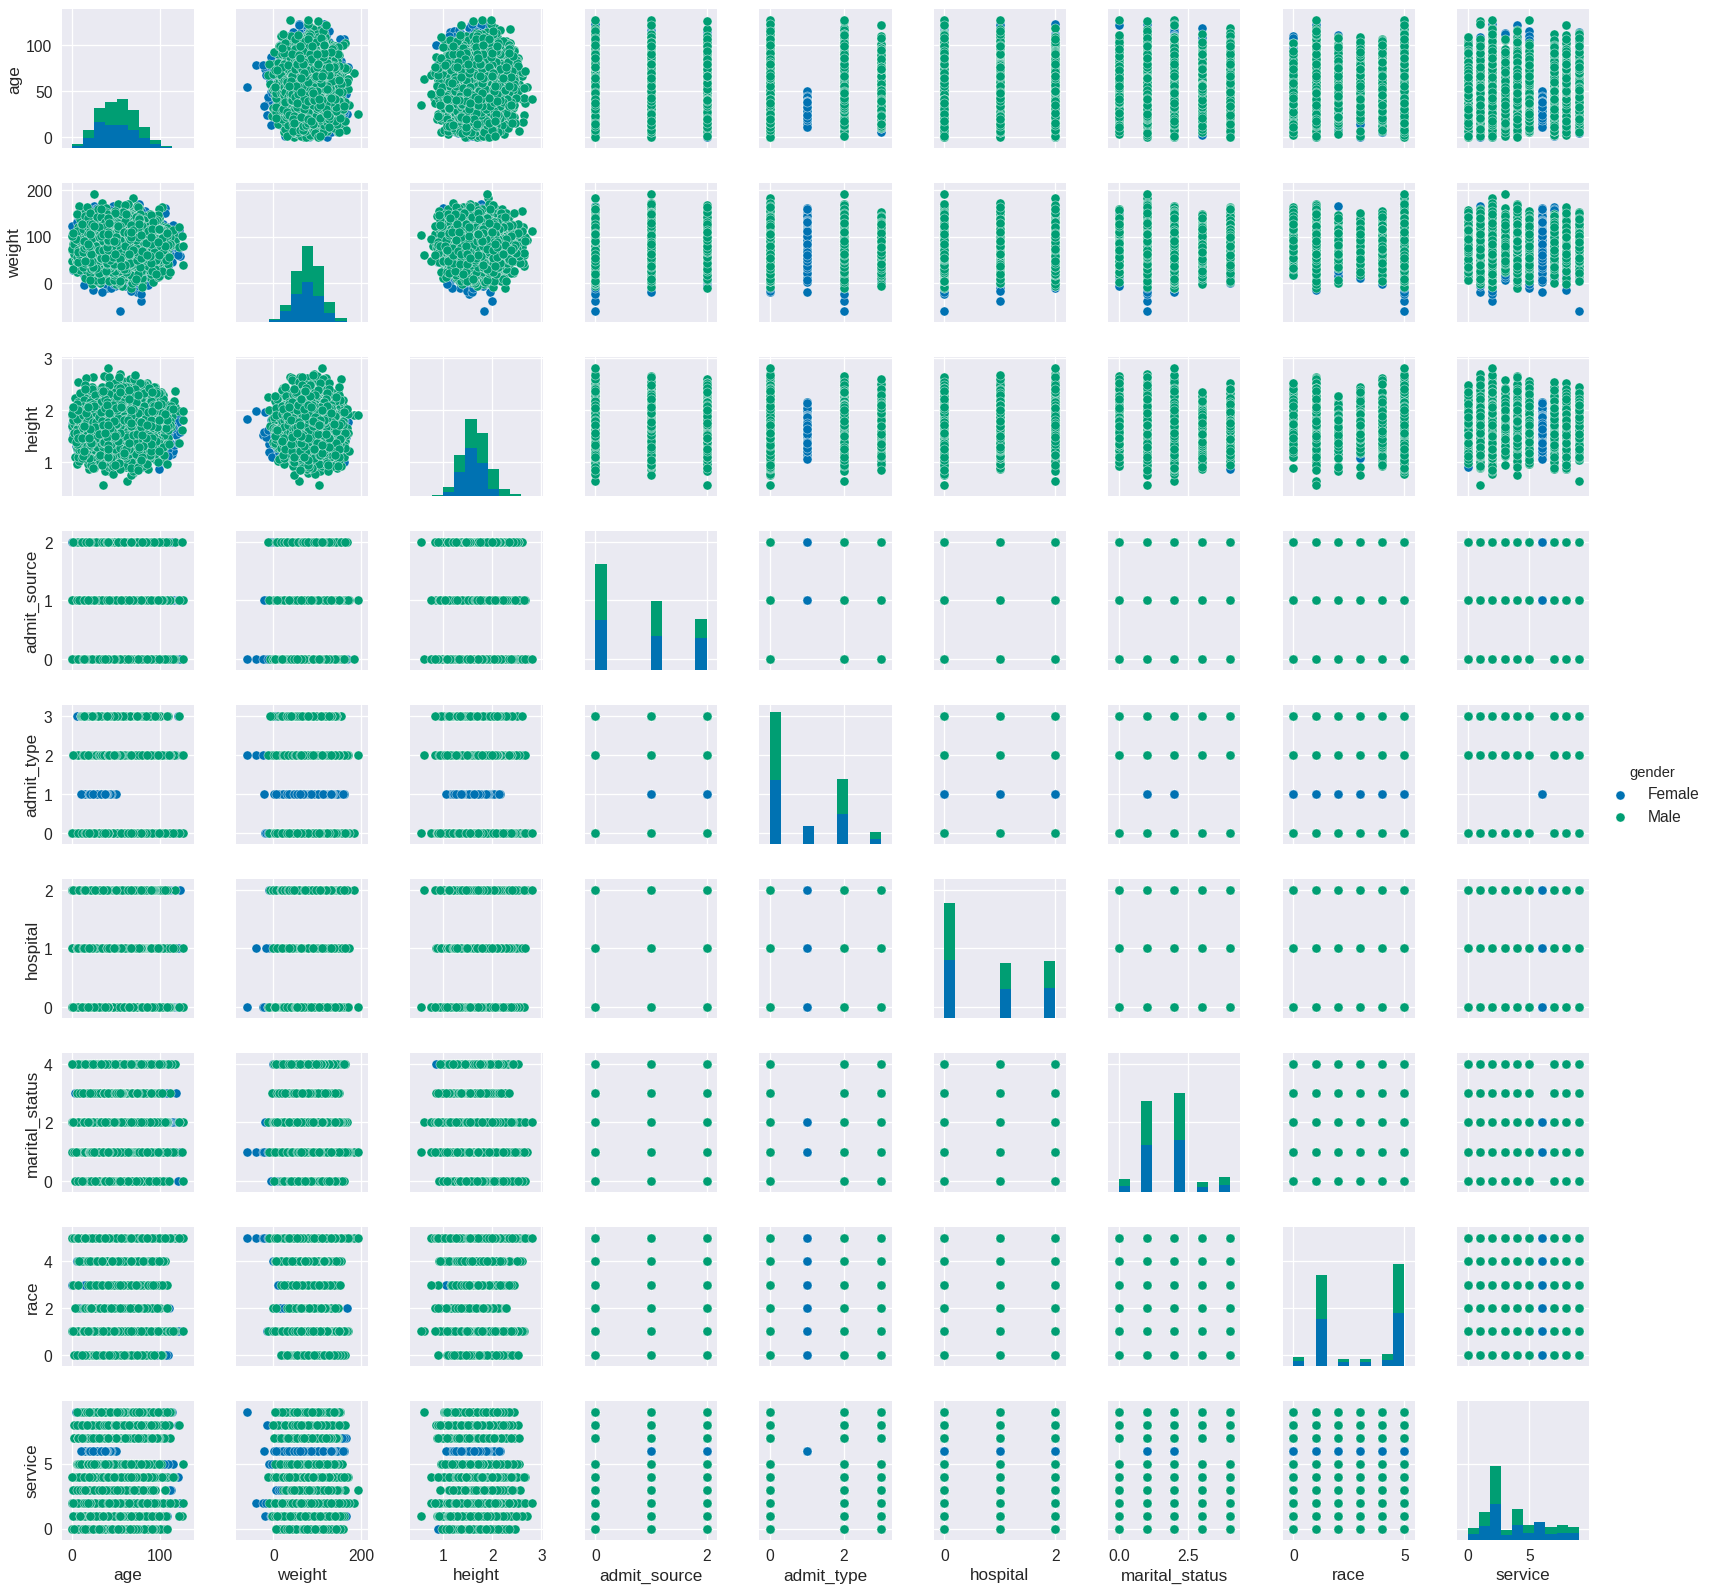

In [60]:
sns.pairplot(demos_encoded, hue='gender')

In [61]:
demos['admit_type'].value_counts()

Emergency    5848
Routine      2875
Pregnancy     773
Urgent        504
Name: admit_type, dtype: int64

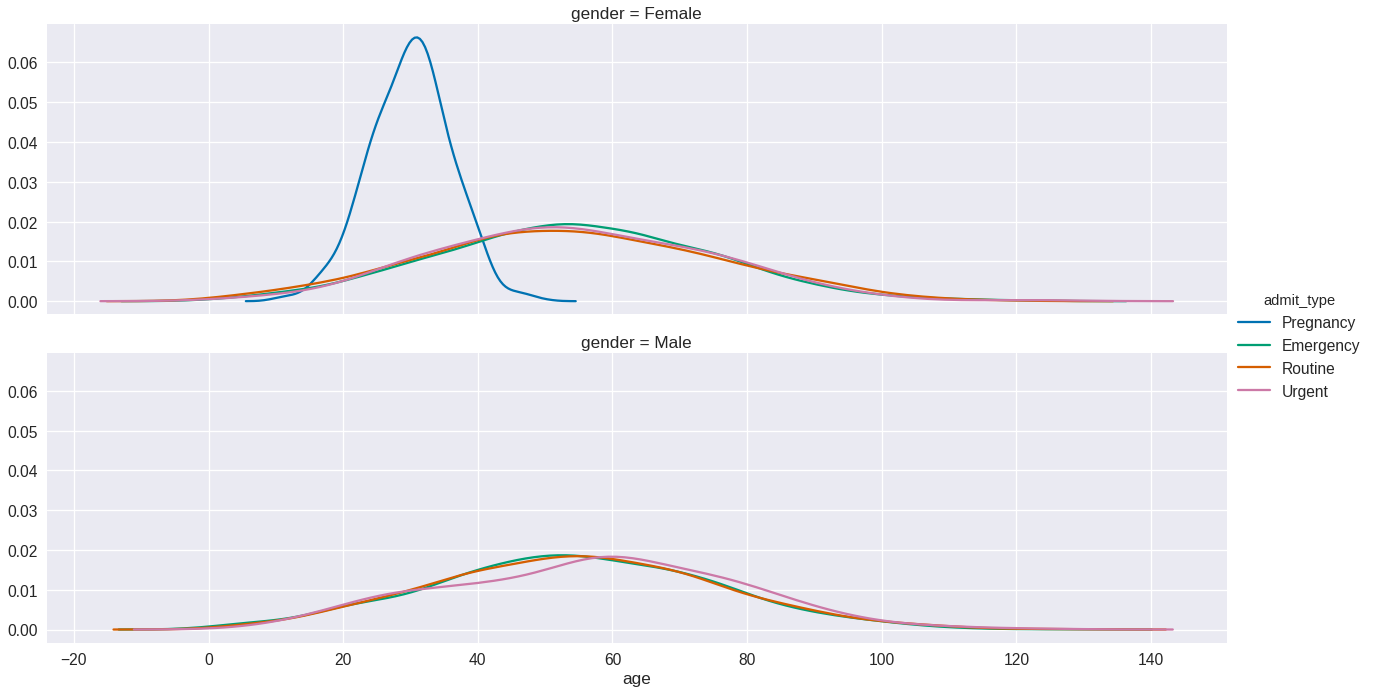

In [62]:
g = sns.FacetGrid(demos, hue="admit_type", row='gender', size=5, aspect=3.5)
g = g.map(sns.kdeplot, "age")
g.add_legend()